<a href="https://colab.research.google.com/github/isaachfp/bi-master/blob/master/OAG/20210119_Exercicio%20-%20Telecom%20-%20ParteA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolução exercício Telecom parte A

## Localização antena A B C

### Instalação e carregamento das bibliotecas de GA em python

In [1]:
!pip install deap

     |████████████████████████████████| 163kB 9.1MB/s 


In [2]:
import random
import numpy
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import math

### Declaração das funções auxiliares que devem conter as informações do problema

In [3]:
# Função Objetivo -> Repare que o único parametro que a função deve receber é um individuo
# A variável 'individual' é uma lista com 6 elementos
def LucroClientes(individual):
  xA = individual[0]
  yA = individual[1]
  xB = individual[2]
  yB = individual[3]
  xC = individual[4]
  yC = individual[5]
  alcanceA = 15
  alcanceB = 12
  alcanceC = 3
  cidadesAtendidasAntenaA = []
  cidadesAtendidasAntenaB = []
  cidadesAtendidasAntenaC = []
  cidadesAtendidas = []
  clientesPorCidade = [7571, 5274, 11082, 11879, 9226, 7942, 6295, 4286, 8132, 11344]
  localizacaoCidades = [(18, 42), (29, 37), (36, 28), (35, 11), (28, 7), (21,15), (8, 26), (18, 31), (6, 4), (50, 46)]
  soma_clientes = 0        
  for localizacaoCidade in localizacaoCidades:
    if((math.sqrt(((xA-localizacaoCidade[0])**2) + ((yA-localizacaoCidade[1])**2)) <= alcanceA)):
      cidadesAtendidasAntenaA.append(1)
    else:
      cidadesAtendidasAntenaA.append(0)
    if((math.sqrt(((xB-localizacaoCidade[0])**2) + ((yB-localizacaoCidade[1])**2)) <= alcanceB)):
      cidadesAtendidasAntenaB.append(1)
    else:
      cidadesAtendidasAntenaB.append(0)
    if((math.sqrt(((xC-localizacaoCidade[0])**2) + ((yC-localizacaoCidade[1])**2)) <= alcanceC)):
      cidadesAtendidasAntenaC.append(1)
    else:
      cidadesAtendidasAntenaC.append(0)
  for i in range(len(cidadesAtendidasAntenaA)):
    if((cidadesAtendidasAntenaA[i] == 1) or (cidadesAtendidasAntenaB[i] == 1) or (cidadesAtendidasAntenaC[i] == 1)):
      cidadesAtendidas.append(True)
    else:
      cidadesAtendidas.append(False)
  i = 0
  for cidadeAtendida in cidadesAtendidas:
    if(cidadeAtendida):
      soma_clientes = soma_clientes + clientesPorCidade[i]
    i = i + 1
  return soma_clientes

In [4]:
# Função de restrição que o problema tiver (nem todos os problemas contém restrições)
def FuncaoDeRestricao(individual):
  return True

In [5]:
# Função utilizada para gerar os individuos -> Repare que não há nenhum mistério, os valores v1 e v2 utilizam a função que é passada por parâmetro que por sua vez
# é uma função que gera numeros aleatorios inteiros entre 0 e 50, como está declarado mais abaixo
# outro ponto importante é como fazer a declaração do cromossomo, procure sempre utilizar tal forma como está decrito, para cada valor, adicionar (append) o mesmo ao cromossomo
# GeradorDeIndividuos(ClasseDoIndividuo, FunçãoDeGeraçãoDeNºAleatorio):
def GeradorDeIndividuos(icls, attr_bool_function):
  i = 0
  cromossomo = list()
  # while True: 
  v1 = attr_bool_function()
  v2 = attr_bool_function()
  v3 = attr_bool_function()
  v4 = attr_bool_function()
  v5 = attr_bool_function()
  v6 = attr_bool_function()
    # if FuncaoDeRestricao(v1, v2, v3, v4, v5, v6):
    #   break
    # i = i + 1
  cromossomo.append(v1)
  cromossomo.append(v2)
  cromossomo.append(v3)
  cromossomo.append(v4)
  cromossomo.append(v5)
  cromossomo.append(v6)
  return icls(cromossomo)

### Declaração dos pacotes referentes a biblioteca do GA: 
#### Nomenclatura referente a biblioteca e deve-se alterar somente os pesos das funções que deverão ser, ou maximizada ou minimizada
#### Pode-se alterar também o tipo da variavel do Individuo. Mas que, geralmente, é uma lista de numeros inteiros

In [6]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,)) # Se tiver + de 1 função objetivo, podem ser colocados os pesos em sequência aqui
creator.create("Individual", list, fitness=creator.FitnessMax)

In [7]:
toolbox = base.Toolbox()
# Definir o gerador de numeros aleatórios de numeros inteiros entre o intervalo (0 e 50)
toolbox.register("attr_bool", random.randint, 0, 50)
# Inicialização do cromossomo (quantos genes o cromossomo deve possuir)
#toolbox.register("individualCreator", GeradorDeIndividuos, toolbox.attr_bool)
toolbox.register("individual", GeradorDeIndividuos, creator.Individual, toolbox.attr_bool)
#toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 2)
# Registro do individuo na população
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Registro do nome da função objetivo
toolbox.register("evaluate", LucroClientes)
# Registro de qual o tipo de cruzamento deve ser utilizado (cruzamento de 2 pontos)
toolbox.register("mate", tools.cxTwoPoint)
# Registro de qual tipo de mutação deve ser utilizado (probabilidade de um individuo sofrer mutação)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.15)
# Registro de qual o tipo do método de seleção que será utilizado
toolbox.register("select", tools.selBest)

## Chamada efetiva do GA para resolução

In [8]:
population = toolbox.population(n=40) #começa com 40 indivíduos
# quantidade de gerações
NGEN=35
bestIndEachGeneration = []
bestInd = []
for gen in range(NGEN):
  print("Geracao: ", gen)
  offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
  fits = list(toolbox.map(toolbox.evaluate, offspring))
  
  indexes = range(len(offspring))
  indexes = [x for _,x in sorted(zip(fits, indexes))]
  fits = [fits[x] for x in indexes]
  offspring = [offspring[x] for x in indexes]
  print(offspring)
  print(fits)
  for fit, ind in zip(fits, offspring):
    ind.fitness.wvalues = fit
  elites_ind = offspring[:max(1, round(0.15*len(offspring)))]
  population = toolbox.select(offspring, len(population)-len(elites_ind))
  population.extend(elites_ind)
  bestIndEachGeneration.append([offspring[fits.index(max(fits))], max(fits)])
  bestInd.append(max(bestIndEachGeneration, key=lambda t:t[1])[1])
  print(" Melhor Avaliação dessa geração: ", bestIndEachGeneration[-1][1], "\n", 
        "Melhor Avaliação Geral", max(bestIndEachGeneration, key=lambda t:t[1])[1], "\n",
        "Da geração: ", bestIndEachGeneration.index(max(bestIndEachGeneration, key=lambda t:t[1])), "\n",
        "Cromossomo: ", max(bestIndEachGeneration, key=lambda t:t[1])[0], "\n"
       )

Geracao:  0
[[6, 7, 4, 16, 6, 1], [1, 19, 2, 12, 40, 37], [11, 28, 30, 44, 37, 46], [46, 0, 38, 39, 9, 1], [42, 45, 34, 41, 12, 0], [0, 45, 19, 8, 6, 49], [17, 49, 10, 23, 15, 35], [0, 18, 14, 42, 31, 21], [9, 22, 48, 2, 45, 37], [19, 47, 6, 37, 36, 45], [45, 50, 18, 17, 31, 27], [43, 6, 37, 11, 9, 7], [49, 27, 45, 34, 37, 9], [45, 25, 43, 13, 27, 3], [5, 33, 20, 34, 30, 3], [15, 34, 16, 32, 6, 30], [30, 46, 42, 34, 50, 33], [37, 43, 31, 41, 20, 41], [20, 39, 22, 18, 5, 35], [20, 4, 4, 9, 1, 18], [1, 14, 26, 46, 7, 41], [7, 15, 30, 40, 18, 48], [31, 36, 42, 36, 7, 33], [26, 24, 36, 38, 27, 29], [15, 30, 45, 35, 33, 39], [39, 4, 4, 3, 17, 22], [15, 22, 50, 45, 11, 27], [4, 42, 41, 19, 29, 25], [16, 14, 14, 10, 13, 1], [42, 20, 29, 0, 18, 2], [19, 6, 19, 45, 33, 25], [5, 36, 28, 27, 19, 37], [17, 23, 42, 20, 47, 47], [28, 36, 11, 18, 31, 8], [10, 17, 30, 21, 9, 44], [32, 7, 30, 30, 27, 20], [27, 23, 9, 26, 4, 18], [22, 26, 39, 12, 22, 22], [45, 39, 33, 13, 19, 33], [6, 28, 30, 18, 39, 11

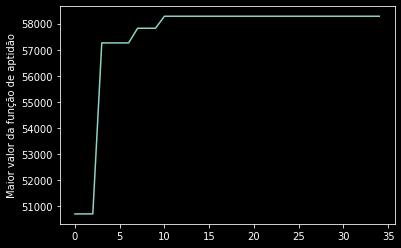

In [9]:
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
plt.plot(bestInd)
plt.ylabel('Maior valor da função de aptidão')
plt.show()